
# Métodos iterativos estacionarios: Jacobi y Gauss-Seidel

**Objetivo general**
- Comparar varios métodos de solución de sistemas de ecuaciones lineales y comprender las ventajas y desventajas de cada uno.

**Objetivos particulares**
- Implementar el método de Jacobi y resolver un problema.
- Implementar el método de Gauss-Seidel y resolver un problema.
- Comparar ambos métodos y decidir cuál de ellos usar para un problema dado.

## Contenido
- [1 - Sistema positivo definido.](#1)
    - [Ejercicio 1. Definir el sistema y resolverlo.](#ej-1)
    - [Ejercicio 2. Graficar las líneas y la solución.](#ej-2)
- [2 - Método de Jacobi](#2)
    - [2.1 - Ejemplo 1.](#2-1)
    - [2.2 - Algoritmo 1.](#2-2)
    - [2.3 - Implementación 1.](#2-3)
    - [Ejercicio 3. Resolver el sistema con el método de Jacobi.](#ej-3)
- [3 - Método de Gauss-Seidel](#3)
    - [3.1 - Ejemplo 2.](#3-1)
    - [3.2 - Algoritmo 2.](#3-2)
    - [3.3 - Implementación 2.](#3-3)
    - [Ejercicio 4. Resolver el sistema con el método de Gauss-Seidel.](#ej-4)
- [Ejercicio 5. Resolver el sistema de ecuaciones de la práctica de la Pre-clase.](#ej-5)

<a name='1'></a>
## Sistema positivo definido

Considere el siguiente sistema de ecuaciones:

$$
\begin{array}{ccc}
3x_0 + 2x_1 & = &2 \\
2x_0 + 6x_1 & = &-8
\end{array} \Longrightarrow
\left[
\begin{array}{cc}
3 & 2 \\
2 & 6
\end{array} \right]
\left[
\begin{array}{cccc}
x_{0} \\
x_{1}
\end{array} \right] 
=
\left[
\begin{array}{c}
2\\ -8
\end{array}
\right] \tag{1}
$$

In [7]:
# Importación de las bibliotecas numpy y matplotlib
import numpy as np
import matplotlib.pyplot as plt
import macti.visual
from macti.SistemasLineales.eigen_fc import graficaPasosSolucion
from macti.evaluacion import Evalua
ȩ = Evalua('./utils/data/')

---
<a name='ej-1'></a>
### **<font color="DodgerBlue">Ejercicio 1. Definir el sistema y resolverlo.</font>**

<font color="DarkBlue">Definir la matriz $A$, el vector $b$ y resolver el sistema.</font>

---

In [2]:
A = np.matrix([[3, 2],[2,6]] )
b = np.array([2,-8])
print("Matriz A : \n",A)
print("Vector b : \n", b)
sol = np.linalg.solve(A,b)
print("Solución del sistema : \n", sol)

Matriz A : 
 [[3 2]
 [2 6]]
Vector b : 
 [ 2 -8]
Solución del sistema : 
 [ 2. -2.]


---
<a name='ej-2'></a>
### **<font color="DodgerBlue">Ejercicio 2. Graficar las líneas y la solución.</font>**

<font color="DarkBlue">Las ecuaciones $(1)$ se pueden escribir como sigue:</font>

$$
\begin{array}{ccc}
\dfrac{3}{2}x_0 + x_1 & = & \dfrac{2}{2} \\
\dfrac{2}{6}x_0 + x_1 & = & -\dfrac{8}{6}
\end{array} \Longrightarrow
\begin{array}{ccc}
y_0 = m_0 x + b_0 \\
y_1 = m_1 x + b_1
\end{array}
$$

donde
$$
\begin{array}{ccc}
m_0 = -\dfrac{3}{2} & b_0 = 1 \\
m_1 = -\dfrac{2}{6} & b_1 = -\dfrac{8}{6}
\end{array}
$$

<font color="Navy">
Realizar las gráficas de estas ecuaciones junto con el punto donde se cruzan. <\font>

---

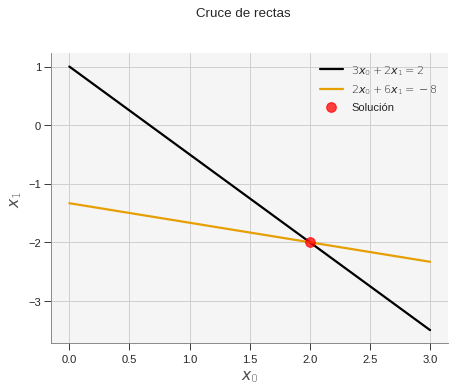

In [3]:
# Parámetros de las rectas
m0 = -3/2
b0 = 1
m1 = -2/6
b1 = -8/6

# Ecuciones de las rectas
x = np.linspace(0,3,20)
y0 = m0 * x + b0
y1 = m1 * x + b1

#Gráficas
plt.plot(x,y0,label = '$3x_0+2x_1=2$')
plt.plot(x,y1,label = '$2x_0+6x_1=-8$')
plt.scatter(sol[0], sol[1], c='red', s = 75, alpha=0.75, zorder=5, label='Solución')

plt.xlabel('$x_0$')
plt.ylabel('$x_1$')
plt.suptitle('Cruce de rectas', y=1)
#plt.grid(c='b')
plt.legend()
plt.show()

<a name='2'></a>
## Método de Jacobi

Para entender el método veamos el siguiente ejemplo:

<a name='2-1'></a>
### Ejemplo 1
Consideremos el siguiente sistema de ecuaciones:

\begin{align}
2x -y &= 9\\
x +6y -2z &= 15\\
4x -3y +8z &= 1\\
\end{align}

Despejamos las incognitas de las ecuaciones:
\begin{align}
x  &= (9 +y_0 )/2\\
y  &= (15 -x_0 +2z_0)/6\\
z &= (1-4x_0+3y_0)/8\\
\end{align}


Teniendo el punto inicial $v_0 = (x_0, y_0, z_0)$.
Suponiendo que el punto inicial sea $v_0 = (0,0,0)$ sustituimos y calculamos el siguiente punto.

\begin{align}
x  &= (9 +0 )/2\\
y  &= (15 -0 +2(0))/6\\
z &= (1-4(0)+3(0))/8\\
\end{align}

Obtenemos
$$v_1 = (4.5,2.5,0.125)$$

Continuamos a la siguiente iteración usando $v_1$ como nueva aproximación.

\begin{align}
x  &= (9 + (2.5)/2\\
y  &= (15 -4.5 +2(0.125))/6\\
z &= (1-4(4.5)+3(2.5))/8\\
\end{align}

Y obtenemos el punto:
$$v_2 = (5.75,1.7916,-1.1875)$$

Se realiza el procedimiento recursivamente hasta parar en alguna iteración.

En este caso las aproximaciones convergen en el punto $(5,1,-2)$

<a name='2-2'></a>
### Algoritmo 1.
<center>
<img src="./utils/figs/Jacobi.png"  width='500px'/>
</center>

<a name='2-3'></a>
### Implementación 1.

En la celda siguiente se muestra el código del método de Jacobi

In [4]:
def jacobi(A,b,tol,kmax,xini):
    N = len(b)
    xnew = np.zeros(N)
    xold = np.zeros(N)
    
    # Solución inicial
    xold[0] = xini[0][0]
    xold[1] = xini[1][0]
    
    error = 10
    k = 0
    print('{:^2} {:^10} {:^12} {:^12}'.format(' i ', 'Error', 'x0', 'x1'))
    while(error > tol and k < kmax) :
        for i in range(0,N): # se puede hacer en paralelo
            xnew[i] = 0
            for j in range(0,i):
                xnew[i] += A[i,j] * xold[j]
            for j in range(i+1,N):
                xnew[i] += A[i,j] * xold[j]                
            xnew[i] = (b[i] - xnew[i]) / A[i,i]
        
        # Almacenamos la solución actual
        xini[0].append(xnew[0])
        xini[1].append(xnew[1])
        
        error = np.linalg.norm(xnew-xold,1)
        k += 1
        xold[:] = xnew[:]
        print('{:2d} {:10.9f} ({:10.9f}, {:10.9f})'.format(k, error, xnew[0], xnew[1]))
    return xnew, error, k

---
<a name='ej-3'></a>
### **<font color="DodgerBlue">Ejercicio 3. Resolver el sistema con el método de Jacobi.</font>**

<font color="DarkBlue"> Haciendo uso de la función `jacobi` definida en la celda superior, aproxima la solución del sistema de ecuaciones del Ejercicio 1. Utiliza una tolerancia de $1e^{-5}$ y $100$ iteraciones. Guarda la solución aproximada que devuelve la función en `solucion`.</font>
    
---

In [5]:
### BEGIN SOLUTION
xini = [[0],[0]]
solucion, error, it = jacobi(A, b, 1e-5, 100, xini)
### END SOLUTION

 i    Error         x0           x1     
 1 2.000000000 (0.666666667, -1.333333333)
 2 1.111111111 (1.555555556, -1.555555556)
 3 0.444444444 (1.703703704, -1.851851852)
 4 0.246913580 (1.901234568, -1.901234568)
 5 0.098765432 (1.934156379, -1.967078189)
 6 0.054869684 (1.978052126, -1.978052126)
 7 0.021947874 (1.985368084, -1.992684042)
 8 0.012193263 (1.995122695, -1.995122695)
 9 0.004877305 (1.996748463, -1.998374232)
10 0.002709614 (1.998916154, -1.998916154)
11 0.001083846 (1.999277436, -1.999638718)
12 0.000602136 (1.999759145, -1.999759145)
13 0.000240855 (1.999839430, -1.999919715)
14 0.000133808 (1.999946477, -1.999946477)
15 0.000053523 (1.999964318, -1.999982159)
16 0.000029735 (1.999988106, -1.999988106)
17 0.000011894 (1.999992071, -1.999996035)
18 0.000006608 (1.999997357, -1.999997357)


In [8]:
ȩ.verifica(solucion, 6)

¡Tu resultado es correcto!


Una vez que la celda superior se ejecute de manera correcta (que pase la prueba), ejecuta la siguiente celda de
código para que veas la grafica correspondiente a la aproximación de la solución de este sistema usando el método
iterativo de Jacobi.

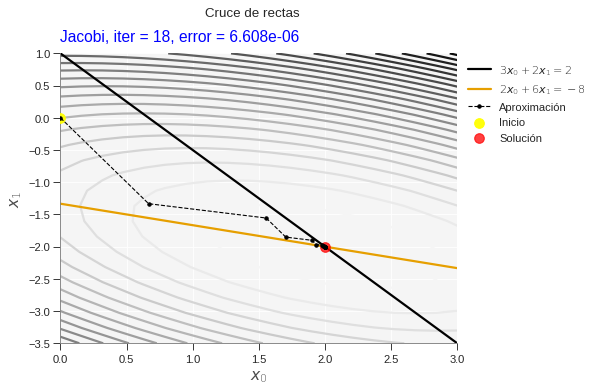

In [9]:
graficaPasosSolucion(x, y0, y1, xini, A, b, solucion, 'Jacobi, iter = {}, error = {:4.3e}'.format(it, error) )

<a name='3'></a>
## Método Gauss-Seidel

Este método se explica en el siguiente ejemplor:

<a name='3-1'></a>
### Ejemplo 2
Consideremos el mismo sistema de ecuaciones:

\begin{align}
2x -y &= 9\\
x +6y -2z &= 15\\
4x -3y +8z &= 1\\
\end{align}

Despejamos las incognitas de las ecuaciones:
\begin{align}
x  &= (9 +y_0 )/2\\
y  &= (15 -x_0 +2z_0)/6\\
z &= (1-4x_0+3y_0)/8\\
\end{align}


Teniendo el punto inicial $v_0 = (x_0, y_0, z_0)$.
Suponiendo que el punto inicial sea $v_0 = (0,0,0)$ sustituimos y calculamos el siguiente punto:

\begin{align}
x  &= (9 +0 )/2 = 4.5\\
y  &= (15 -4.5 +2(0))/6 = 1.75\\
z &= (1-4(4.5)+3(1.75))/8 = -1.46\\
\end{align}

Obtenemos
$$v_1 = (4.5,1.75,-1.46)$$

Continuamos a la siguiente iteración usando $v_1$ como siguiente aproximación.

\begin{align}
x  &= (9 + (4.5)/2 = 5.375\\
y  &= (15 -5.375 +2(-1.46))/6 = 1.11\\
z &= (1-4(5.375)+3(1.11))/8 = -2.14\\
\end{align}

Y obtenermos el punto:
$$v_2 = (5.375,1.11,-2.14)$$

Se realiza el procedimiento recursivamente hasta parar en alguna iteración.

En este caso las aproximaciones convergen en el punto $(5,1,-2)$ más rápido que con el método de Jacobi.

<a name='3-2'></a>
### Algoritmo 2.

<center>
<img src="./utils/figs/Gauss_Seidel.png"  width='500px'/>
</center>

<a name='3-3'></a>
### Implementación 2.

A continuación se muestra el código para el método iterativo de Gauss-Seidel

In [10]:
def gauss_seidel(A,b,tol,kmax,xini):
    N = len(b)
    xnew = np.zeros(N)
    xold = np.zeros(N)
    
    # Solución inicial
    xold[0] = xini[0][0]
    xold[1] = xini[1][0]
    
    error = 10
    k = 0
    print('{:^2} {:^10} {:^12} {:^12}'.format(' i ', 'Error', 'x0', 'x1'))
    while(error > tol and k < kmax) :
        for i in range(0,N): # se puede hacer en paralelo
            xnew[i] = 0
            for j in range(0,i):
                xnew[i] += A[i,j] * xnew[j]
            for j in range(i+1,N):
                xnew[i] += A[i,j] * xold[j]                
            xnew[i] = (b[i] - xnew[i]) / A[i,i]
            
        # Almacenamos la solución actual
        xini[0].append(xnew[0])
        xini[1].append(xnew[1])
        
        error = np.linalg.norm(xnew-xold)
        k += 1
        xold[:] = xnew[:]
        print('{:2d} {:10.9f} ({:10.9f}, {:10.9f})'.format(k, error, xnew[0], xnew[1]))
    return xnew, error, k

---
<a name='ej-4'></a>
### **<font color="DodgerBlue">Ejercicio 4. Resolver el sistema con el método de Gauss-Seidel.</font>**

<font color="DarkBlue">Haciendo uso de la función `gauss_seidel` definida en la celda superior, aproxima la solución del sistema de ecuaciones del Ejercicio 1. Utiliza una tolerancia de $1e^{-5}$ y $100$ iteraciones. Guarda la solución aproximada que devuelve la función en `solucion`.</font>
    
---

In [11]:
### BEGIN SOLUTION
xini = [[0],[0]]
solucion, error, it = gauss_seidel(A, b, 1e-5, 100, xini)
### END SOLUTION

 i    Error         x0           x1     
 1 1.692394024 (0.666666667, -1.555555556)
 2 1.093133018 (1.703703704, -1.901234568)
 3 0.242918449 (1.934156379, -1.978052126)
 4 0.053981877 (1.985368084, -1.995122695)
 5 0.011995973 (1.996748463, -1.998916154)
 6 0.002665772 (1.999277436, -1.999759145)
 7 0.000592394 (1.999839430, -1.999946477)
 8 0.000131643 (1.999964318, -1.999988106)
 9 0.000029254 (1.999992071, -1.999997357)
10 0.000006501 (1.999998238, -1.999999413)


In [12]:
ȩ.verifica(solucion, 7)

¡Tu resultado es correcto!


Una vez que la celda superior se ejecute de manera correcta (que pase la prueba), ejecuta la siguiente celda de
código para que veas la grafica correspondiente a la aproximación de la solución de este sistema usando el método
iterativo de Gauss-Seidel.

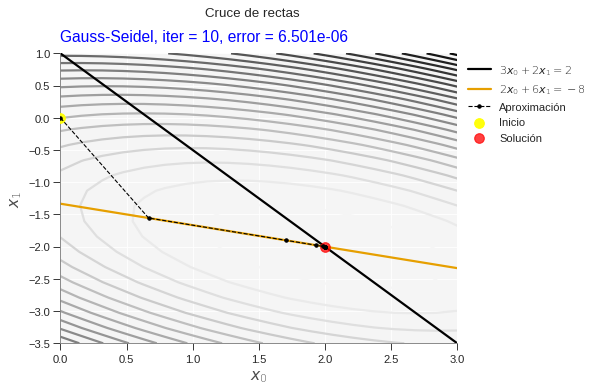

In [13]:
graficaPasosSolucion(x, y0, y1, xini, A, b, solucion, 'Gauss-Seidel, iter = {}, error = {:4.3e}'.format(it,error))

---
<a name='ej-5'></a>
## **<font color="DodgerBlue">Ejercicio 5. Resolver el sistema de ecuaciones de la práctica de la Pre-clase.</font>**

<font color="DarkBlue"> Intente resolver el sistema de ecuaciones definido en el primer ejercicio de la Pre-clase usando los métodos de Jacobi y de Gauss-Seidel. Describe que pasa en cada caso. Busque una solución inicial que le permita obtener la solución. Haga solo unas cuantas iteraciones (2 a 5) y grafique los resultados.
En caso de que no logre obtener una solución adecuada, discuta con su equipo y posteriormente en la sala general las razones de lo anterior.</font>
    
---

In [14]:
# Megabytes desde 0 hasta 1500 (1.5 GB)
x = np.linspace(0,1500,10)

# Fórmulas de cada compañía
### BEGIN SOLUTION
PA = 0.10 * x + 200
PB = 0.30 * x + 20
### END SOLUTION

In [15]:
A = np.array([[0.10, -1.],[0.30,-1.]] )
b = np.array([-200.0,-20.0])

In [16]:
### BEGIN SOLUTION
xini = [[900],[285]]
solucion, error, it = jacobi(A, b, 1e-5, 10, xini)
### END SOLUTION

 i    Error         x0           x1     
 1 55.000000000 (850.000000000, 290.000000000)
 2 65.000000000 (900.000000000, 275.000000000)
 3 165.000000000 (750.000000000, 290.000000000)
 4 195.000000000 (900.000000000, 245.000000000)
 5 495.000000000 (450.000000000, 290.000000000)
 6 585.000000000 (900.000000000, 155.000000000)
 7 1485.000000000 (-450.000000000, 290.000000000)
 8 1755.000000000 (900.000000000, -115.000000000)
 9 4455.000000000 (-3150.000000000, 290.000000000)
10 5265.000000000 (900.000000000, -925.000000000)


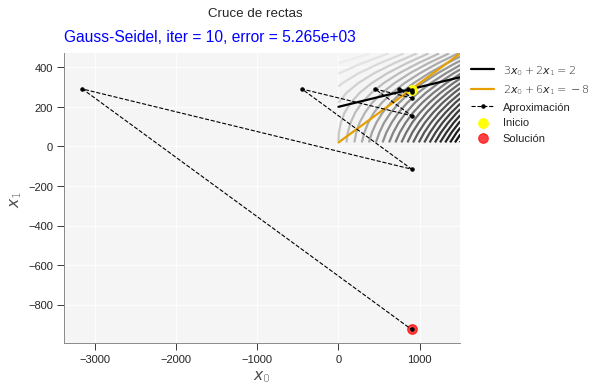

In [17]:
graficaPasosSolucion(x, PA, PB, xini, A, b, solucion, 'Gauss-Seidel, iter = {}, error = {:4.3e}'.format(it,error))